# Ali Zulfikar
## TI - 3H / 20
### Machine Learning Courses

### The Challenge

1. Identify the variables that will be used as independent variables (features) and target variables (personal medical costs).
2. Divide the dataset into training data and test data with appropriate proportions.
3. Perform feature scaling if necessary.
4. Create a multiple linear regression model using Scikit-Learn.
5. Train the model on training data and make predictions on test data.
6. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Show evaluation results.

## Import library

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('dataset/insurance.csv')

## Identify the variables that will be used as independent variables (features) and target variables (personal medical costs).

Untuk mengidentifikasi apakah variable tersebut independent atau tidak dapat dilihat melalui kepengaruhan variable tersebut (dipengaruhi atau tidak)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Terdapat 7 kolom, yaitu
age, sex, bmi, children, smoker, region, charges

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Jumlah data mencapai 1338 data, terlihat terdapat 2 float, 2 integer, dan 3 obj string

In [11]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Melihat jumlah unique dari `sex`, `region`, dan `smoker`

In [17]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [19]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Terlihat data tidak ada yang *NULL*, well tetapi saya rasa saya perlu melakukan encoding terhadap `sex`, `region`, dan `smoker`. Karena ketiga kolom tersebut juga memiliki sebuah nilai kategorikal. Saya akan menggunakan LabelEncoder

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

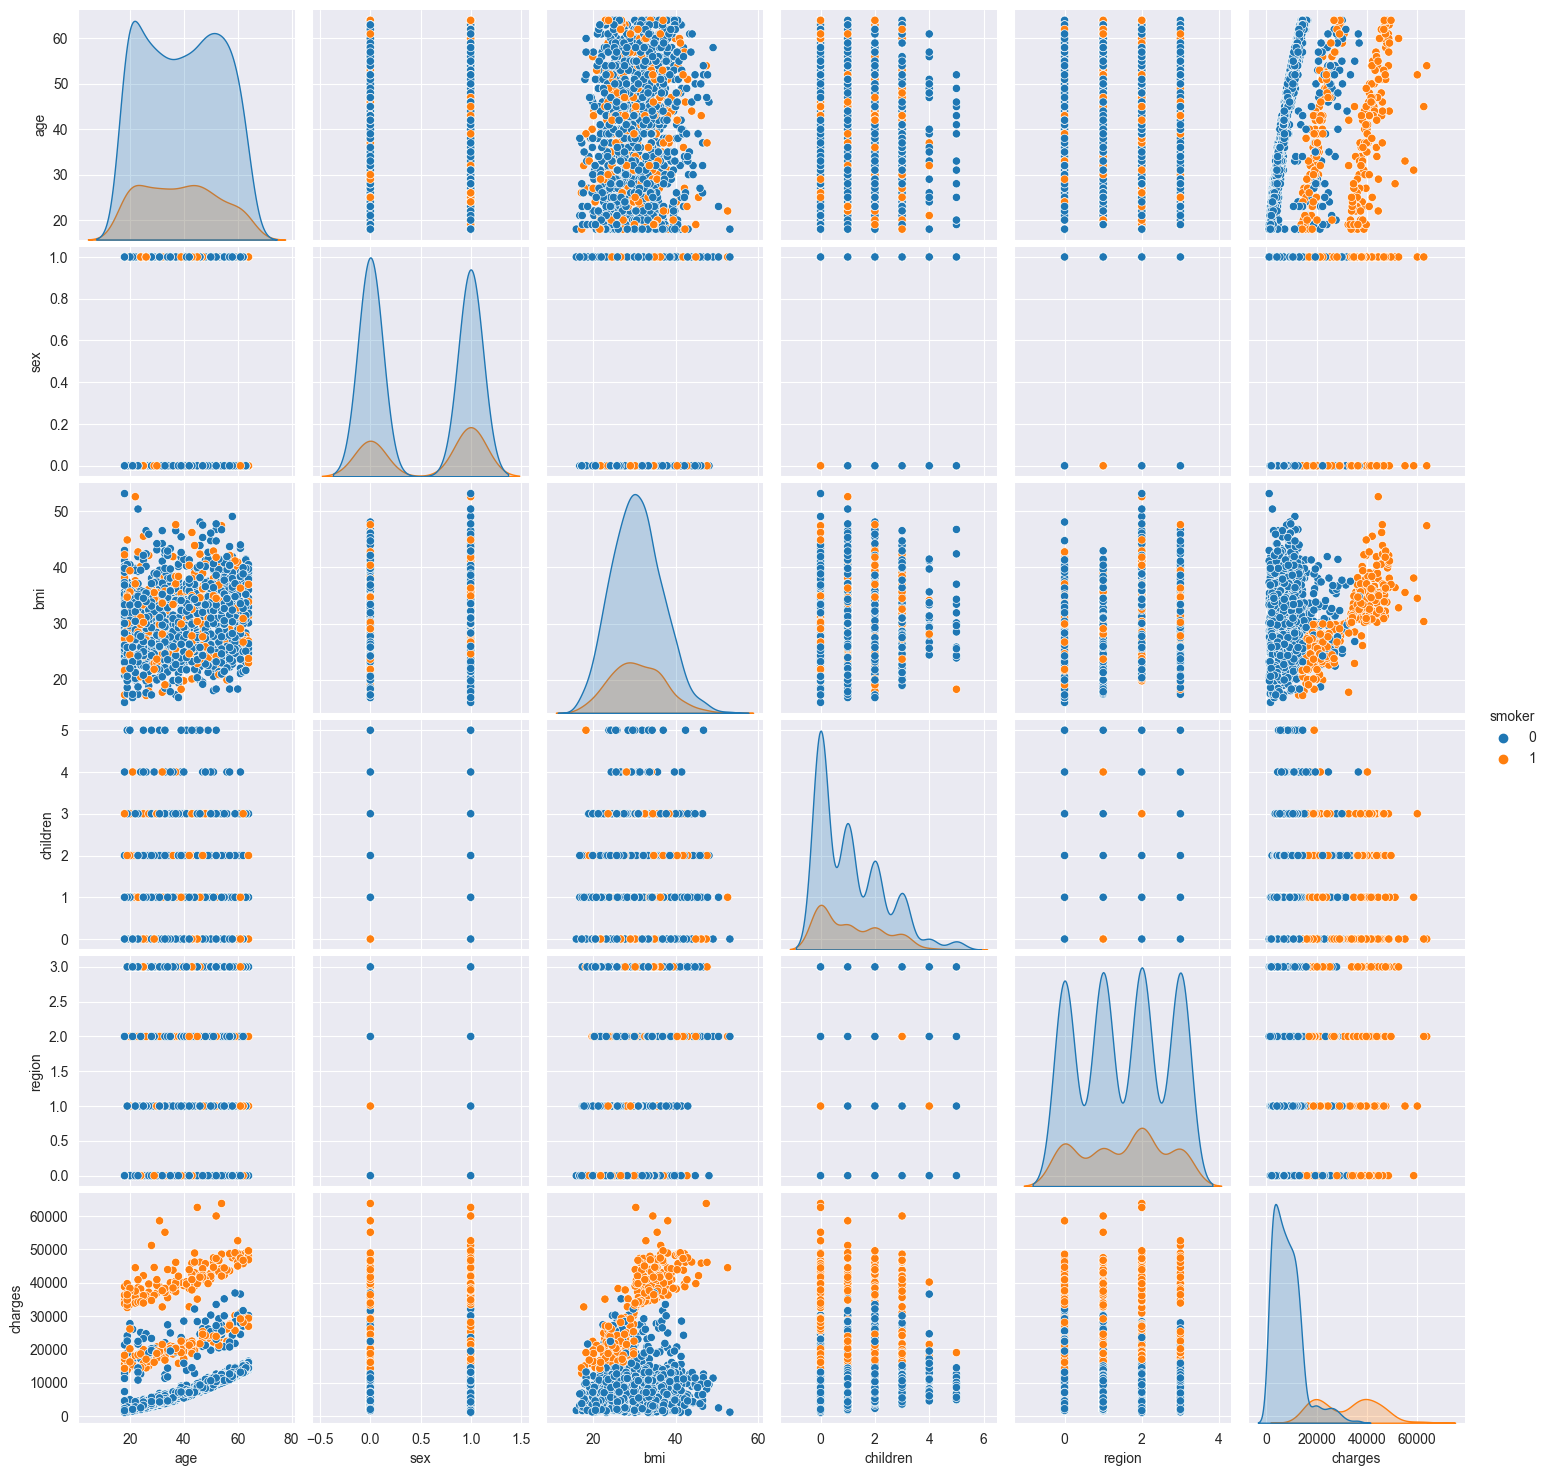

In [67]:
sns.pairplot(df,hue="smoker")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

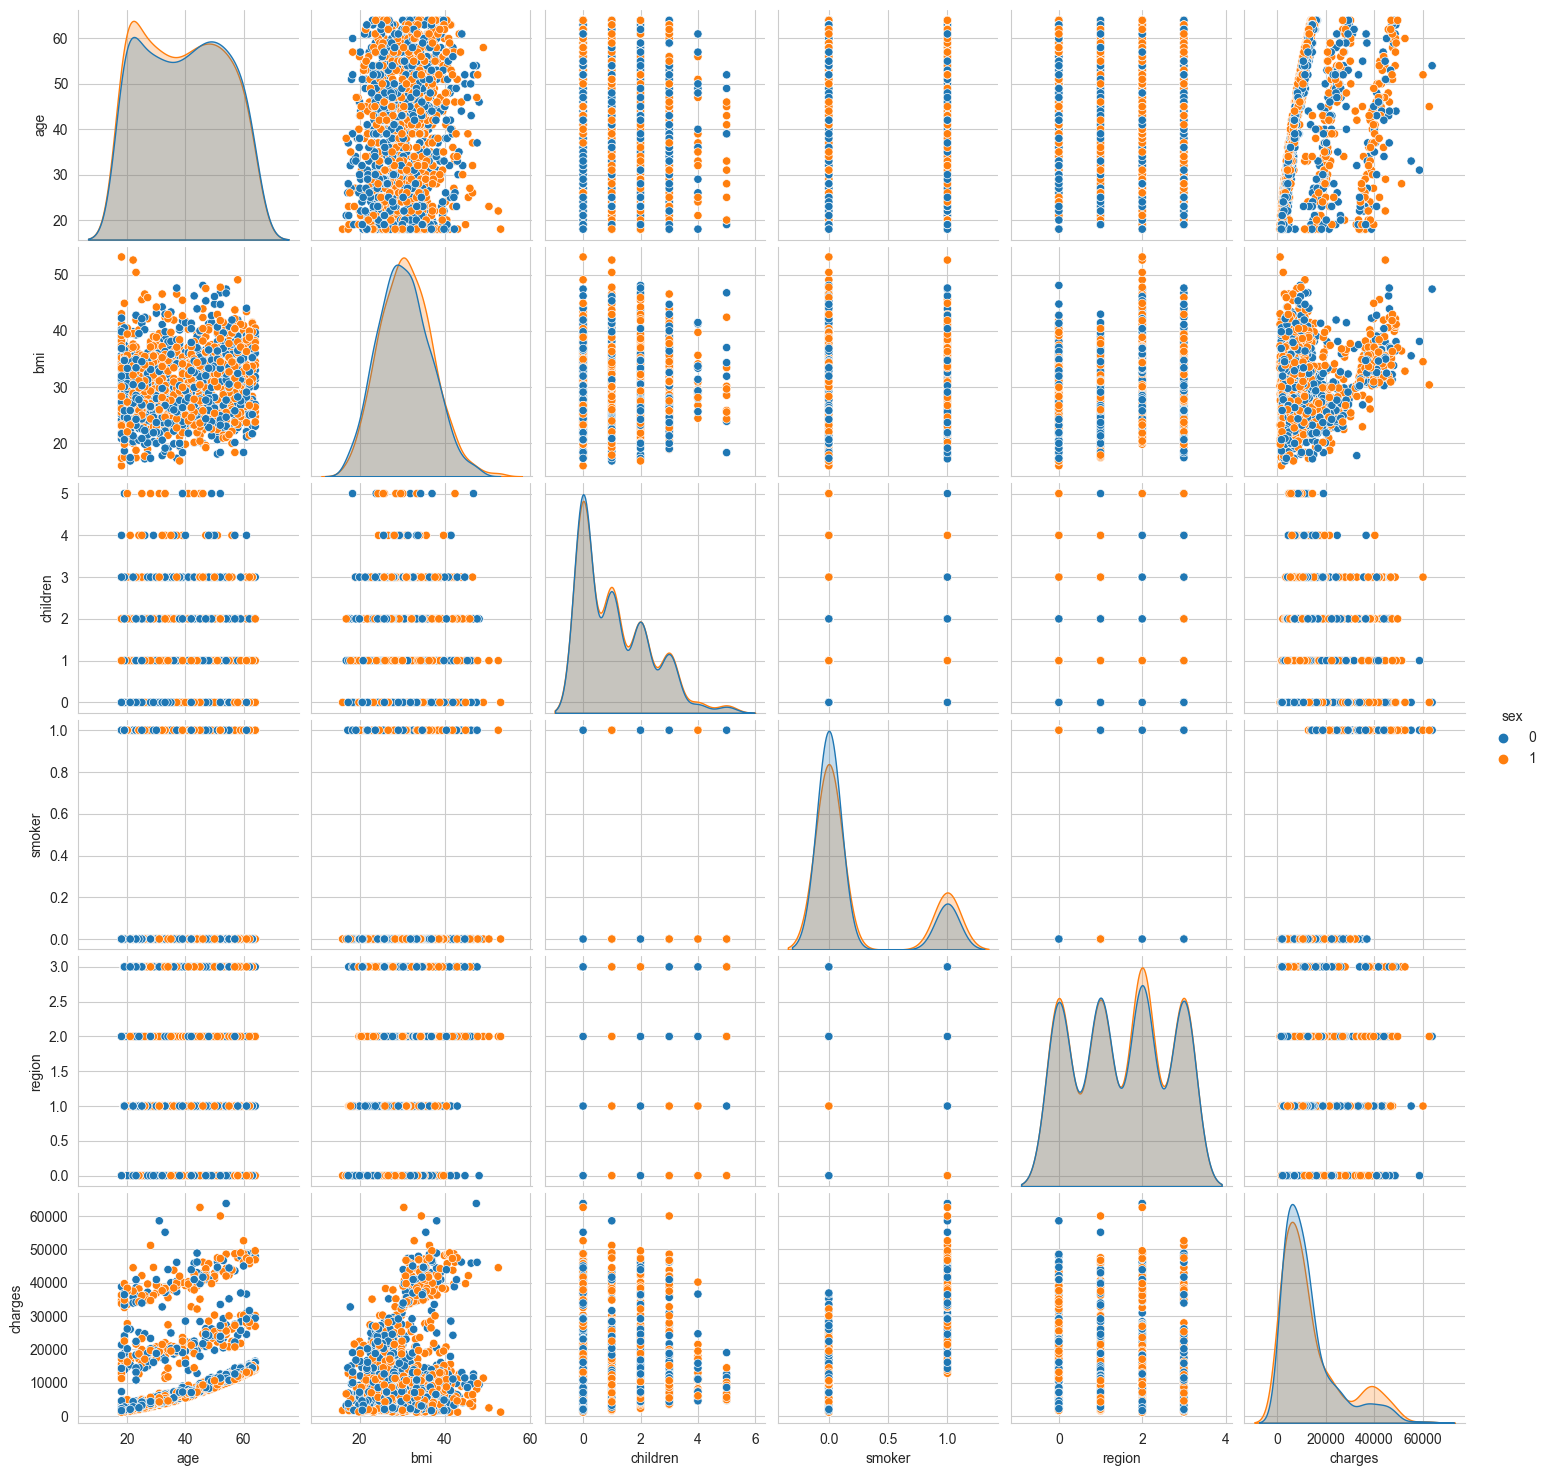

In [68]:
sns.pairplot(df,hue="sex")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

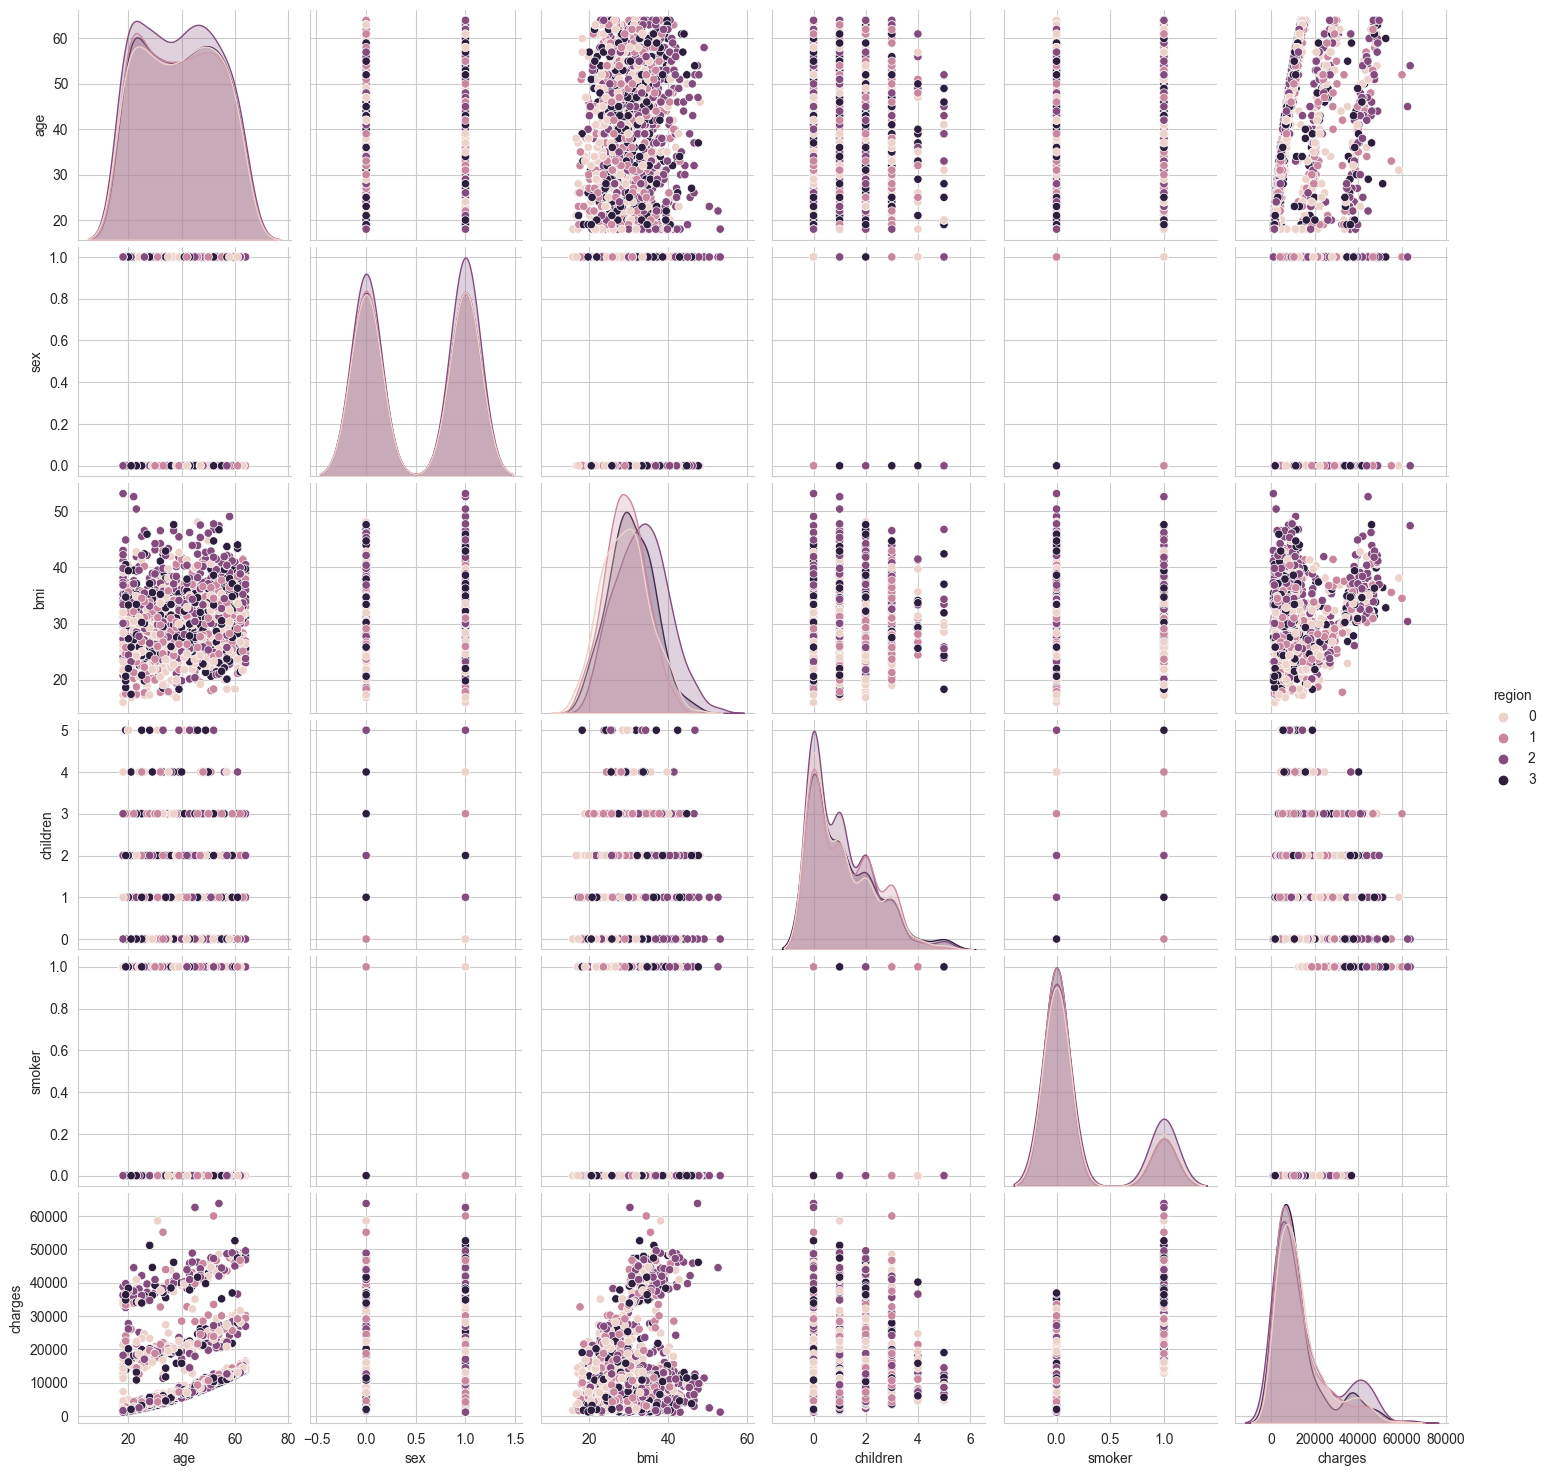

In [69]:
sns.pairplot(df,hue="region")

## Perform feature scaling if necessary.

In [70]:
scaler = LabelEncoder()
df['smoker'] = scaler.fit_transform(df['smoker'])
df['region'] = scaler.fit_transform(df['region'])
df['sex'] = scaler.fit_transform(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Anyway, dapat disimpulkan bahwa
Independent Variable = age, sex, bmi, children, smoker, region
Dependent Variable = `charges`

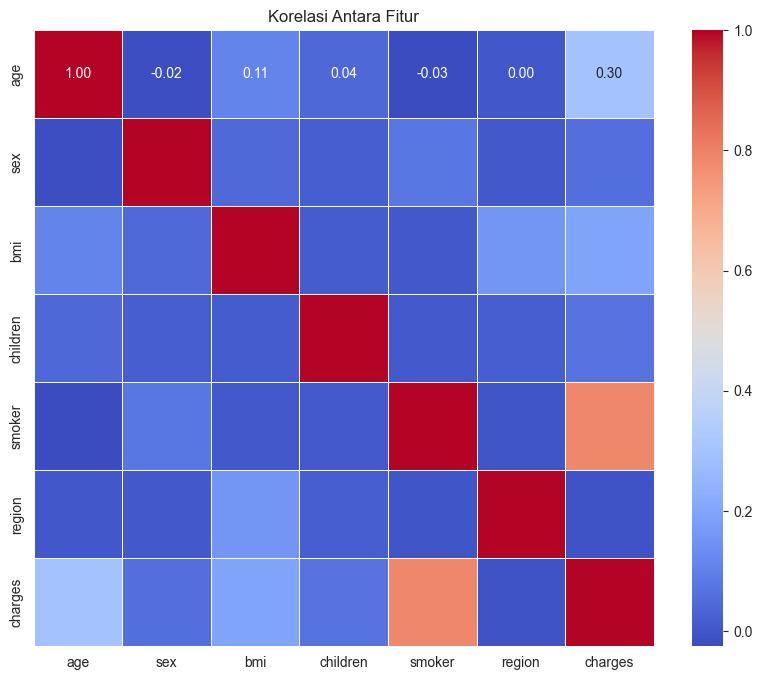

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antara Fitur")
plt.show()

Kalau melakukan analisis visual, ternyata didapatkan bahwa `smoker`, `age`, dan `bmi` memiliki korelasi cenderung kuat dengan `charges`

## Divide the dataset into training data and test data with appropriate proportions.

In [83]:
y = df[['charges']]
X = df[['smoker', 'age', 'bmi']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membagi data menjadi 80 % untuk train dan 20% untuk test

## Create a multiple linear regression model using Scikit-Learn.

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Melatih model Regresi Linear

In [75]:
y_pred = model.predict(X_test)

In [76]:
print('Slope: ', model.coef_)
print ('Intercept: ',model.intercept_)

Slope:  [[23675.37184666   259.41020462   326.45023215]]
Intercept:  [-11707.80233458]


In [77]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse: .4f}")
print(f"R-Squared: {r2: .4f}")

Mean Squared Error:  34512843.8802
R-Squared:  0.7777


R-Squared mendekati 1, dapat disimpulkan bahwa model memiliki prediksi yang cukup baik